 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:
# !pip install torchvision

import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

Скачаем обучающую и контрольную выборки.

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=20,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=20,
                                         shuffle=False, num_workers=2)

#classes = (<перечислите классы как строки>)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

Количество картинок в train и test:

In [ ]:
print('train ', trainloader.dataset.data.shape[0])
print('test ', testloader.dataset.data.shape[0])

train  60000
test  10000


Распределение классов:

In [ ]:
print('train:')
for i in trainloader.dataset.targets.unique():
  print(i, ' - ', (trainloader.dataset.targets == i).sum())

train:
tensor(0)  -  tensor(6000)
tensor(1)  -  tensor(6000)
tensor(2)  -  tensor(6000)
tensor(3)  -  tensor(6000)
tensor(4)  -  tensor(6000)
tensor(5)  -  tensor(6000)
tensor(6)  -  tensor(6000)
tensor(7)  -  tensor(6000)
tensor(8)  -  tensor(6000)
tensor(9)  -  tensor(6000)


In [ ]:
print('test:')
for i in testloader.dataset.targets.unique():
  print(i, ' - ', (testloader.dataset.targets == i).sum())

test:
tensor(0)  -  tensor(1000)
tensor(1)  -  tensor(1000)
tensor(2)  -  tensor(1000)
tensor(3)  -  tensor(1000)
tensor(4)  -  tensor(1000)
tensor(5)  -  tensor(1000)
tensor(6)  -  tensor(1000)
tensor(7)  -  tensor(1000)
tensor(8)  -  tensor(1000)
tensor(9)  -  tensor(1000)


Количество объектов разных классов распределено равномерно

Вывод картинок:

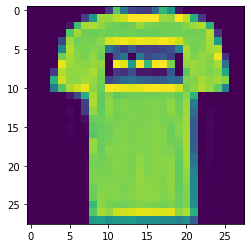

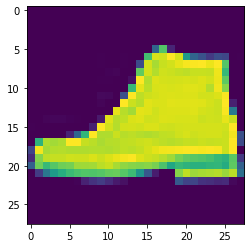

In [ ]:
for i in (1, 42, 420, 1489):
  num_img = trainloader.dataset.data[i].numpy()
  plt.imshow(num_img)
  plt.show()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from tqdm import notebook

MLP

In [ ]:
mlp_net = torch.nn.Sequential(
    torch.nn.Linear(28*28, 250),
    torch.nn.ReLU(),
    torch.nn.Linear(250, 130),
    torch.nn.Sigmoid(),
    torch.nn.Linear(130, 70),
    torch.nn.ReLU(),
    torch.nn.Linear(70, 10),
    torch.nn.LogSoftmax(dim=1)
)

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.SGD(mlp_net.parameters(), lr=learning_rate)

mlp_loss = []

for epoch in notebook.tqdm(range(15)):
    
    running_loss = 0.0
    for i, batch in enumerate(notebook.tqdm(trainloader)):

        X_batch, y_batch = batch

        X_batch = X_batch.reshape(X_batch.shape[0], -1)
        
        optimizer.zero_grad()

        y_pred = mlp_net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    mlp_loss.append(running_loss/len(trainloader))

print('Обучение закончено')

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Обучение закончено


In [ ]:
plt.plot(mlp_loss)

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

y = []
y_predict = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.reshape(images.shape[0], -1)
        y_pred = mlp_net(images)
        _, predicted = torch.max(y_pred, 1)
        y.extend(labels)
        y_predict.extend(predicted)
        c = (predicted == labels).squeeze()
        for i in range(images.shape[0]):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 71 %
Accuracy of     1 : 89 %
Accuracy of     2 : 46 %
Accuracy of     3 : 76 %
Accuracy of     4 : 62 %
Accuracy of     5 : 78 %
Accuracy of     6 : 26 %
Accuracy of     7 : 84 %
Accuracy of     8 : 88 %
Accuracy of     9 : 90 %


In [ ]:

from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y, y_predict)

0.7156

CNN

In [ ]:
class CNN_net(nn.Module):
    def __init__(self):
        super(CNN_net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(5 * 5 * 64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.dropout(x)
        x = self.pool(x)
        #print(x.shape)
        x = x.view(-1, 5 * 5 * 64)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x))
        return x

In [ ]:
net = CNN_net()

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

cnn_loss = []

for epoch in notebook.tqdm(range(15)):
    
    running_loss = 0.0
    for i, batch in enumerate(notebook.tqdm(trainloader)):

        X_batch, y_batch = batch

        
        optimizer.zero_grad()

        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
    cnn_loss.append(running_loss/len(trainloader))

print('Обучение закончено')

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Обучение закончено


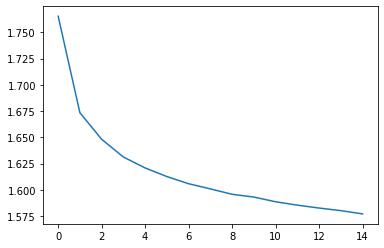

In [ ]:
plt.plot(cnn_loss)

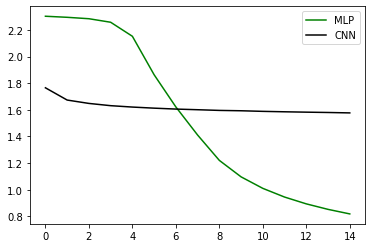

In [ ]:
plt.plot(mlp_loss, c='green', label="MLP")
plt.plot(cnn_loss, c='black', label="CNN")
plt.legend(loc="upper right")
plt.show();


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

y = []
y_predict = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        y.extend(labels)
        y_predict.extend(predicted)
        c = (predicted == labels).squeeze()
        for i in range(images.shape[0]):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of     0 : 84 %
Accuracy of     1 : 97 %
Accuracy of     2 : 85 %
Accuracy of     3 : 89 %
Accuracy of     4 : 81 %
Accuracy of     5 : 97 %
Accuracy of     6 : 59 %
Accuracy of     7 : 91 %
Accuracy of     8 : 96 %
Accuracy of     9 : 96 %


In [ ]:
accuracy_score(y, y_predict)

0.8775